In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Loading the dataset through the tensorflow Package
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizing the data from the range of [0, 255] to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshaping the data to include the channel dimension
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# One-hot encoding of the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# Convolutional Neural Network Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compiling the CNN model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [4]:
# Training
history = model.fit(x_train, y_train, epochs=100, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/100
938/938 [==============================] - 52s 55ms/step - loss: 0.2479 - accuracy: 0.9238 - val_loss: 0.0539 - val_accuracy: 0.9837
Epoch 2/100
938/938 [==============================] - 47s 50ms/step - loss: 0.0880 - accuracy: 0.9737 - val_loss: 0.0344 - val_accuracy: 0.9890
Epoch 3/100
938/938 [==============================] - 48s 51ms/step - loss: 0.0652 - accuracy: 0.9807 - val_loss: 0.0300 - val_accuracy: 0.9896
Epoch 4/100
938/938 [==============================] - 47s 50ms/step - loss: 0.0506 - accuracy: 0.9845 - val_loss: 0.0270 - val_accuracy: 0.9910
Epoch 5/100
938/938 [==============================] - 48s 51ms/step - loss: 0.0444 - accuracy: 0.9866 - val_loss: 0.0267 - val_accuracy: 0.9919
Epoch 6/100
938/938 [==============================] - 46s 49ms/step - loss: 0.0376 - accuracy: 0.9884 - val_loss: 0.0255 - val_accuracy: 0.9899
Epoch 7/100
938/938 [==============================] - 50s 53ms/step - loss: 0.0342 - accuracy: 0.9897 - val_loss: 0.0204 - val_ac

313/313 [==============================] - 3s 10ms/step - loss: 0.0550 - accuracy: 0.9937
Test accuracy: 0.9937000274658203
313/313 [==============================] - 2s 7ms/step


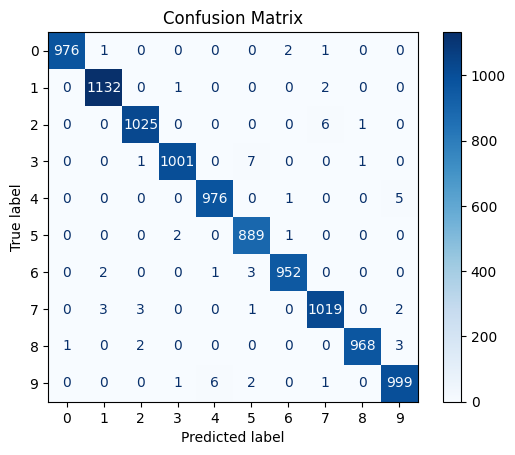

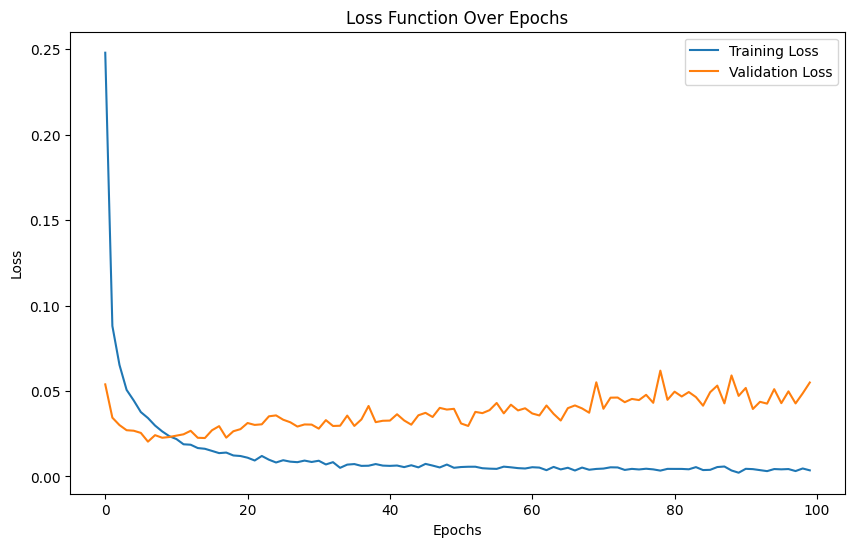

In [5]:
# Accuracy
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

# Confusion Matrix
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=range(10))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Loss function Over Epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Function Over Epochs')
plt.legend()
plt.show()

In [6]:
model.save('mnist_cnn_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
